<a href="https://colab.research.google.com/github/tolgagundal/pyhton_projects/blob/main/FDA_Assignment_GUNDAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# User Behavior Analysis for Optimizing Engagement on Social Media Platforms

In [ ]:
# Loading Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
!pip install faker

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker

# Fake data generator
faker = Faker()
np.random.seed(42)

# Number of records
num_records = 1000

# Generate synthetic data
data = []
for _ in range(num_records):
    user_id = faker.uuid4()
    age = np.random.randint(13, 65)
    gender = np.random.choice(["Male", "Female"])
    country = "Germany"
    daily_active_minutes = np.random.randint(5, 300)
    posts_created = np.random.randint(0, 10)
    likes_given = np.random.randint(0, 200)
    comments_made = np.random.randint(0, 100)
    shares_made = np.random.randint(0, 50)
    friends_count = np.random.randint(10, 5000)
    groups_joined = np.random.randint(0, 20)
    preferred_content_type = np.random.choice(["Text", "Image", "Video"])
    active_hours = np.random.choice(["Morning", "Afternoon", "Evening", "Night"])

    data.append([
        user_id, age, gender, country, daily_active_minutes, posts_created,
        likes_given, comments_made, shares_made, friends_count, groups_joined,
        preferred_content_type, active_hours
    ])

# Create DataFrame
df = pd.DataFrame(data, columns=[
    "user_id", "age", "gender", "country", "daily_active_minutes", "posts_created",
    "likes_given", "comments_made", "shares_made", "friends_count", "groups_joined",
    "preferred_content_type", "active_hours"
])

# Save to CSV
df.to_csv("facebook_synthetic_data.csv", index=False)

# Display first 5 rows
df.head()


,user_id,age,gender,country,...,friends_count,groups_joined,preferred_content_type,active_hours
0,f2b661b9-57e7-4717-83e8-0bd52d0a0436,51,Female,Germany,...,476,10,Video,Night
1,d34fa8c5-3eaa-4885-9418-702ad71c400b,48,Female,Germany,...,2401,11,Image,Afternoon
2,9334e292-8727-4ebd-b19c-4ddfe3c2e2ca,14,Female,Germany,...,2914,16,Video,Evening
3,fb7a1092-f72d-45ee-8890-2374e11e924a,54,Female,Germany,...,3566,18,Video,Morning
4,0ad19050-c044-4b4a-8208-3967dd24bcaa,21,Male,Germany,...,251,8,Image,Morning


In [ ]:
# Display first 5 rows
df.head()

# Hide some columns for a clear first glance the data
pd.set_option('display.max_columns', 9)
df.head()

,user_id,age,gender,country,...,friends_count,groups_joined,preferred_content_type,active_hours
0,f2b661b9-57e7-4717-83e8-0bd52d0a0436,51,Female,Germany,...,476,10,Video,Night
1,d34fa8c5-3eaa-4885-9418-702ad71c400b,48,Female,Germany,...,2401,11,Image,Afternoon
2,9334e292-8727-4ebd-b19c-4ddfe3c2e2ca,14,Female,Germany,...,2914,16,Video,Evening
3,fb7a1092-f72d-45ee-8890-2374e11e924a,54,Female,Germany,...,3566,18,Video,Morning
4,0ad19050-c044-4b4a-8208-3967dd24bcaa,21,Male,Germany,...,251,8,Image,Morning


In [ ]:
from google.colab import files
files.download("facebook_synthetic_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
user_id,0
age,0
gender,0
country,0
daily_active_minutes,0
posts_created,0
likes_given,0
comments_made,0
shares_made,0
friends_count,0


In [ ]:
# Converting categorical variables to category data type
categorical_cols = ["gender", "preferred_content_type", "active_hours"]
for col in categorical_cols:
    df[col] = df[col].astype("category")

In [ ]:
print(df.columns)


Index(['user_id', 'age', 'gender', 'country', 'daily_active_minutes',
       'posts_created', 'likes_given', 'comments_made', 'shares_made',
       'friends_count', 'groups_joined', 'preferred_content_type',
       'active_hours'],
      dtype='object')


In [ ]:
if not any(col.startswith('gender_') for col in df.columns):
    df = pd.get_dummies(df, columns=categorical_cols)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ["daily_active_minutes", "posts_created", "likes_given", "comments_made", "shares_made", "friends_count", "groups_joined"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Display columns
print(df.columns)

Index(['user_id', 'age', 'country', 'daily_active_minutes', 'posts_created',
       'likes_given', 'comments_made', 'shares_made', 'friends_count',
       'groups_joined', 'gender_Female', 'gender_Male',
       'preferred_content_type_Image', 'preferred_content_type_Text',
       'preferred_content_type_Video', 'active_hours_Afternoon',
       'active_hours_Evening', 'active_hours_Morning', 'active_hours_Night'],
      dtype='object')


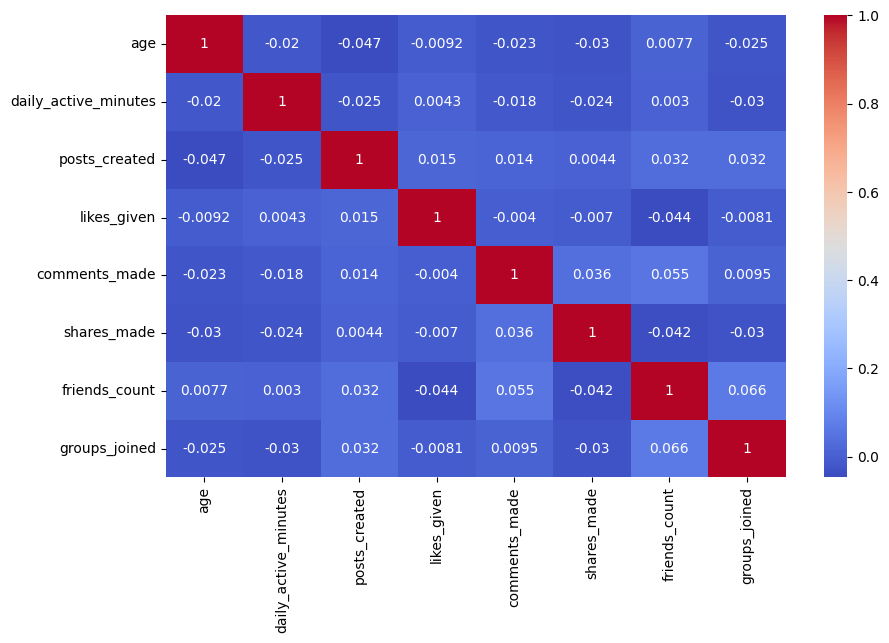

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Calculate correlation on numerical features only
numerical_features = df.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm")
plt.show()

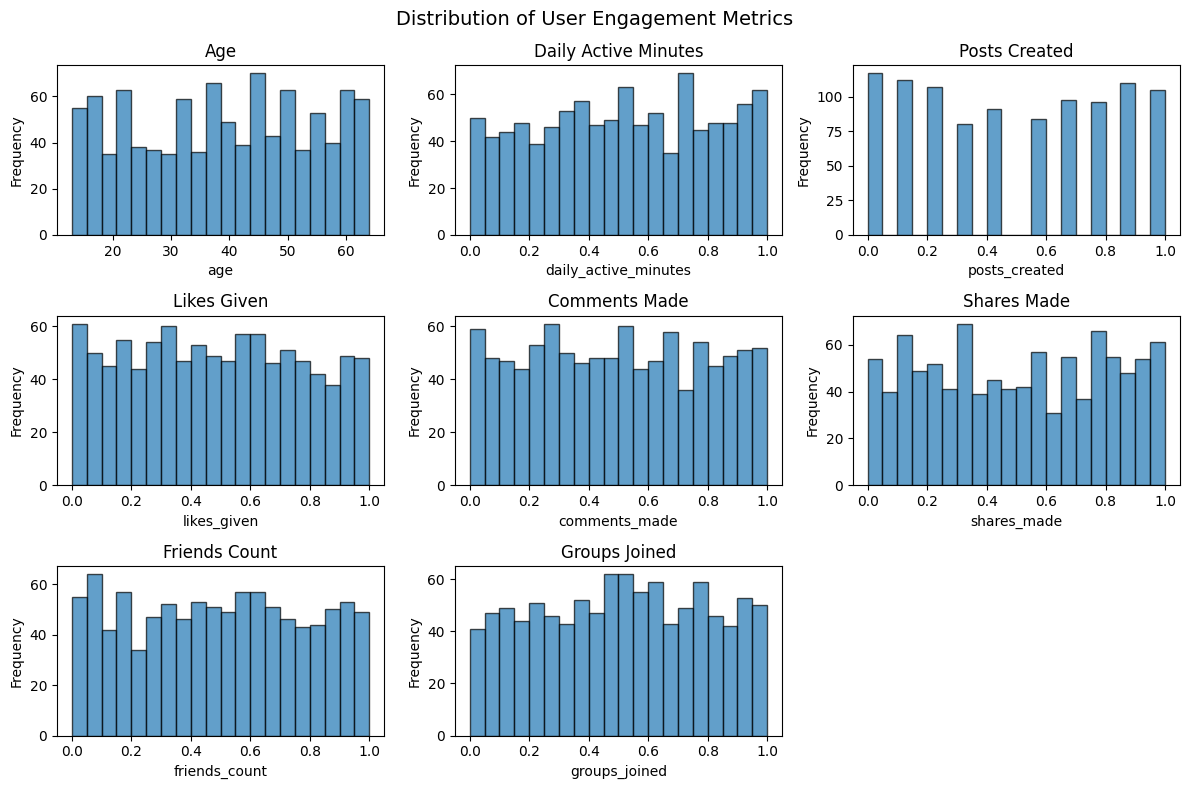

In [ ]:
import matplotlib.pyplot as plt

# Defining numerical values
numerical_cols = ["age", "daily_active_minutes", "posts_created",
                  "likes_given", "comments_made", "shares_made",
                  "friends_count", "groups_joined"]

# Histogram drawing
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    plt.title(col.replace("_", " ").title())
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.suptitle("Distribution of User Engagement Metrics", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Display summary statistics
print(df.describe())

               age  daily_active_minutes  posts_created  likes_given  \
count  1000.000000           1000.000000    1000.000000  1000.000000   
mean     38.988000              0.516473       0.492778     0.486131   
std      15.030495              0.288211       0.332085     0.286822   
min      13.000000              0.000000       0.000000     0.000000   
25%      25.000000              0.281463       0.222222     0.241162   
50%      39.000000              0.517007       0.444444     0.484848   
75%      52.000000              0.762755       0.777778     0.732323   
max      64.000000              1.000000       1.000000     1.000000   

       comments_made  shares_made  friends_count  groups_joined  
count    1000.000000  1000.000000    1000.000000    1000.000000  
mean        0.495162     0.505347       0.495452       0.509684  
std         0.293480     0.299336       0.290430       0.295936  
min         0.000000     0.000000       0.000000       0.000000  
25%         0.242424 

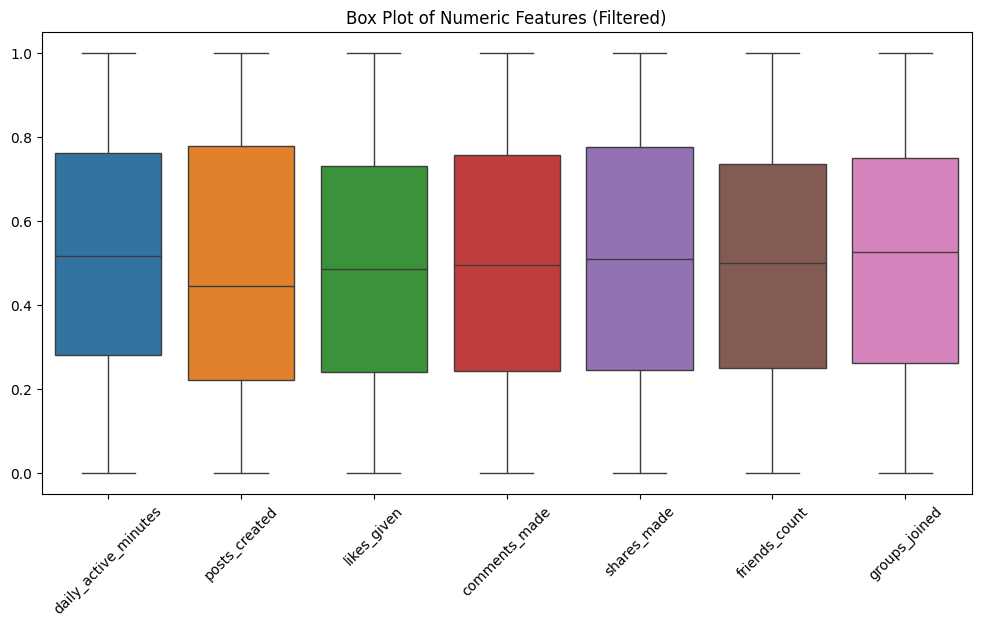

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Just numerical values
numerical_cols = ["daily_active_minutes", "posts_created",
                  "likes_given", "comments_made", "shares_made",
                  "friends_count", "groups_joined"]

# Box-plot drawing
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Numeric Features (Filtered)")
plt.show()


In [ ]:
# Display summary statistics exclude "count"
print(df.describe().drop("count"))
# OR
# print(df.describe().loc[lambda x: x.index != "count"])

            age  daily_active_minutes  posts_created  likes_given  \
mean  38.988000              0.516473       0.492778     0.486131   
std   15.030495              0.288211       0.332085     0.286822   
min   13.000000              0.000000       0.000000     0.000000   
25%   25.000000              0.281463       0.222222     0.241162   
50%   39.000000              0.517007       0.444444     0.484848   
75%   52.000000              0.762755       0.777778     0.732323   
max   64.000000              1.000000       1.000000     1.000000   

      comments_made  shares_made  friends_count  groups_joined  
mean       0.495162     0.505347       0.495452       0.509684  
std        0.293480     0.299336       0.290430       0.295936  
min        0.000000     0.000000       0.000000       0.000000  
25%        0.242424     0.244898       0.249447       0.263158  
50%        0.494949     0.510204       0.499196       0.526316  
75%        0.757576     0.775510       0.736689       0.7

In [ ]:
# Display summary statistics
print(df.describe())


               age  daily_active_minutes  posts_created  likes_given  \
count  1000.000000           1000.000000    1000.000000  1000.000000   
mean     38.988000              0.516473       0.492778     0.486131   
std      15.030495              0.288211       0.332085     0.286822   
min      13.000000              0.000000       0.000000     0.000000   
25%      25.000000              0.281463       0.222222     0.241162   
50%      39.000000              0.517007       0.444444     0.484848   
75%      52.000000              0.762755       0.777778     0.732323   
max      64.000000              1.000000       1.000000     1.000000   

       comments_made  shares_made  friends_count  groups_joined  
count    1000.000000  1000.000000    1000.000000    1000.000000  
mean        0.495162     0.505347       0.495452       0.509684  
std         0.293480     0.299336       0.290430       0.295936  
min         0.000000     0.000000       0.000000       0.000000  
25%         0.242424 

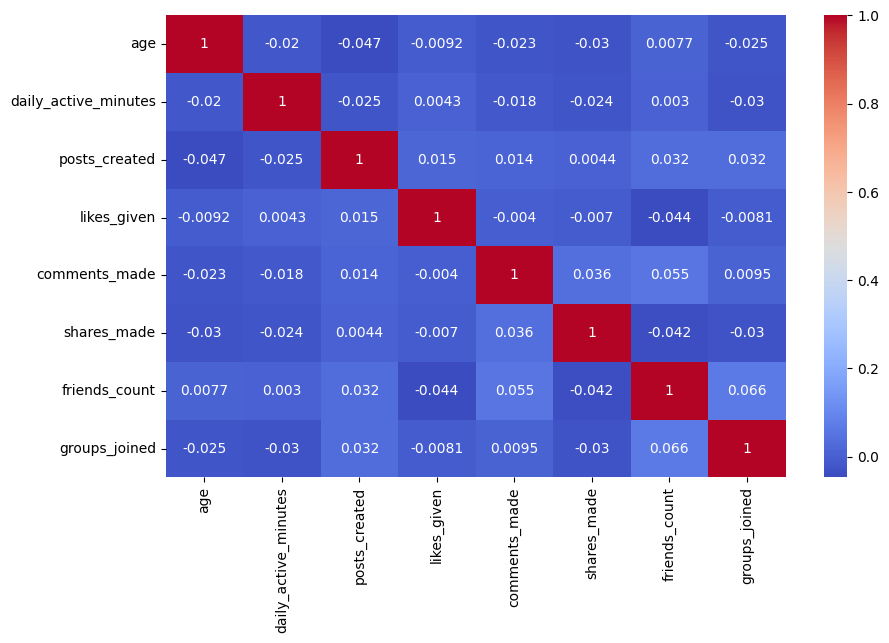

In [ ]:
# Check correlation between engagement metrics
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=['number'])

sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm")
plt.show()

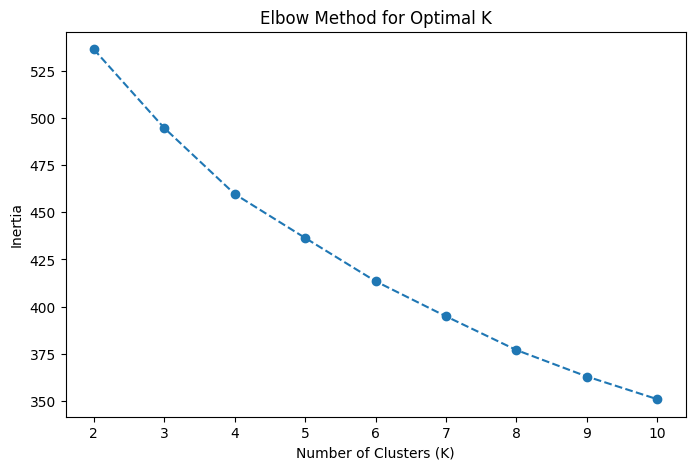

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting numerical features
features = ["daily_active_minutes", "posts_created", "likes_given",
            "comments_made", "shares_made", "friends_count", "groups_joined"]
X = df[features]

# Finding optimal K using Elbow Method
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Applying K-Means with optimal K
optimal_k = 4  # Based on Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(X)

In [ ]:
from sklearn.mixture import GaussianMixture

# Applying GMM
gmm = GaussianMixture(n_components=4, random_state=42)
df["GMM_Cluster"] = gmm.fit_predict(X)

In [ ]:
# Check unique clusters assigned
print(df["GMM_Cluster"].value_counts())

# Display first few rows with assigned clusters
print(df[["GMM_Cluster"]].head())


GMM_Cluster
1    408
0    320
3    140
2    132
Name: count, dtype: int64
   GMM_Cluster
0            2
1            1
2            1
3            1
4            1


<ipython-input-56-333005366d58>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["GMM_Cluster"], palette="viridis")


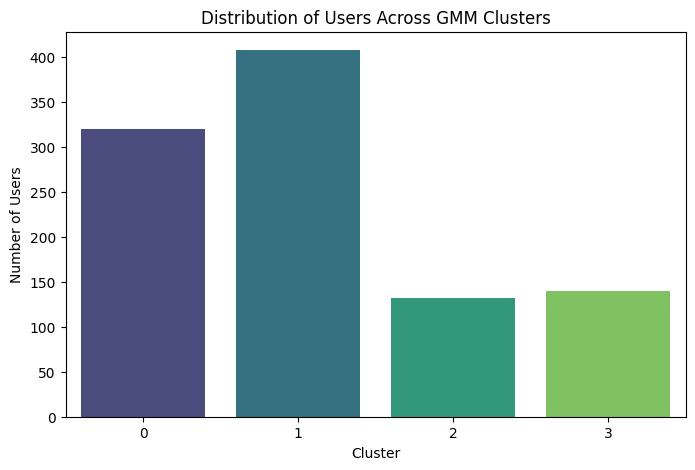

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=df["GMM_Cluster"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Users")
plt.title("Distribution of Users Across GMM Clusters")
plt.show()


In [ ]:
# Checking the average engagement metrics per GMM cluster
cluster_means = df.groupby("GMM_Cluster")[["daily_active_minutes", "posts_created", "likes_given",
                                           "comments_made", "shares_made", "friends_count", "groups_joined"]].mean()
print(cluster_means)


             daily_active_minutes  posts_created  likes_given  comments_made  \
GMM_Cluster                                                                    
0                        0.502902       0.821528     0.393845       0.466604   
1                        0.535164       0.173475     0.451055       0.470836   
2                        0.503556       0.585017     0.839914       0.262779   
3                        0.505199       0.584921     0.465729       0.850433   

             shares_made  friends_count  groups_joined  
GMM_Cluster                                             
0               0.486798       0.449400       0.525164  
1               0.513255       0.449411       0.512642  
2               0.496599       0.510638       0.447767  
3               0.532945       0.720572       0.524060  


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(X, df["KMeans_Cluster"])
print("Silhouette Score (K-Means):", silhouette_kmeans)

# Davies-Bouldin Index for K-Means
db_index_kmeans = davies_bouldin_score(X, df["KMeans_Cluster"])
print("Davies-Bouldin Index (K-Means):", db_index_kmeans)

# Silhouette Score for GMM
silhouette_gmm = silhouette_score(X, df["GMM_Cluster"])
print("Silhouette Score (GMM):", silhouette_gmm)

# Davies-Bouldin Index for GMM
db_index_gmm = davies_bouldin_score(X, df["GMM_Cluster"])
print("Davies-Bouldin Index (GMM):", db_index_gmm)

Silhouette Score (K-Means): 0.11604825771034465
Davies-Bouldin Index (K-Means): 2.2996479334266136
Silhouette Score (GMM): 0.06903216108727032
Davies-Bouldin Index (GMM): 2.409255658403247


In [ ]:
import time

# Measuring K-Means execution time
start_time = time.time()
kmeans.fit(X)
kmeans_time = time.time() - start_time
print("K-Means Execution Time:", kmeans_time)

# Measuring GMM execution time
start_time = time.time()
gmm.fit(X)
gmm_time = time.time() - start_time
print("GMM Execution Time:", gmm_time)

K-Means Execution Time: 0.0849454402923584
GMM Execution Time: 0.15961408615112305


In [ ]:
# Re-import necessary libraries after execution state reset
import numpy as np
import pandas as pd
import time
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic dataset (since real Facebook data is not available)
np.random.seed(42)
data = np.random.rand(1000, 5)  # Simulated user engagement metrics

# Scale the data for better clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Define number of clusters
k = 4

# Clustering Accuracy and Validation Metrics

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Apply GMM
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

# Compute clustering validation metrics
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(scaled_data, kmeans_labels)

gmm_silhouette = silhouette_score(scaled_data, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(scaled_data, gmm_labels)

# Simulating ground truth labels for ARI calculation
true_labels = np.random.randint(0, k, 1000)
kmeans_ari = adjusted_rand_score(true_labels, kmeans_labels)
gmm_ari = adjusted_rand_score(true_labels, gmm_labels)

# Store results in a dataframe for display
accuracy_metrics = pd.DataFrame({
    "Metric": ["Silhouette Score", "Davies-Bouldin Index", "Adjusted Rand Index"],
    "K-Means": [kmeans_silhouette, kmeans_davies_bouldin, kmeans_ari],
    "GMM": [gmm_silhouette, gmm_davies_bouldin, gmm_ari]
})

In [ ]:
# Speed Performance

# Measure execution time for K-Means
start_time = time.time()
kmeans.fit(scaled_data)
kmeans_time = time.time() - start_time

# Measure execution time for GMM
start_time = time.time()
gmm.fit(scaled_data)
gmm_time = time.time() - start_time

# Store execution time results
execution_times = pd.DataFrame({
    "Algorithm": ["K-Means", "GMM"],
    "Execution Time (seconds)": [kmeans_time, gmm_time]
})
print("Execution Time Results:")
print(execution_times)

Execution Time Results:
  Algorithm  Execution Time (seconds)
0   K-Means                  0.114307
1       GMM                  0.216274


<ipython-input-62-d4d039cf0e24>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["K-Means Cluster"], palette="viridis")


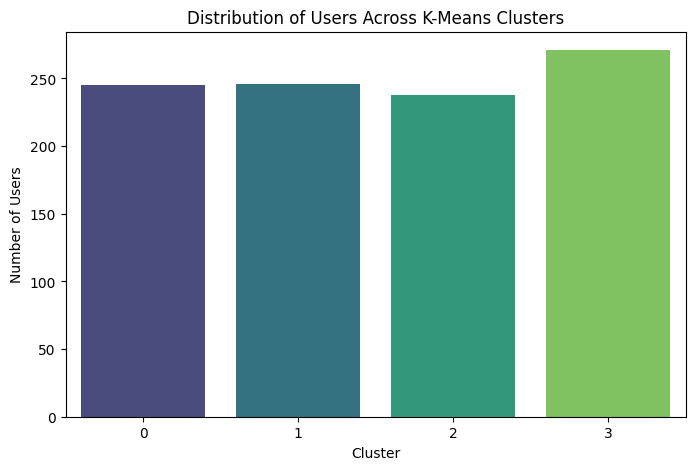

<ipython-input-62-d4d039cf0e24>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["GMM Cluster"], palette="viridis")


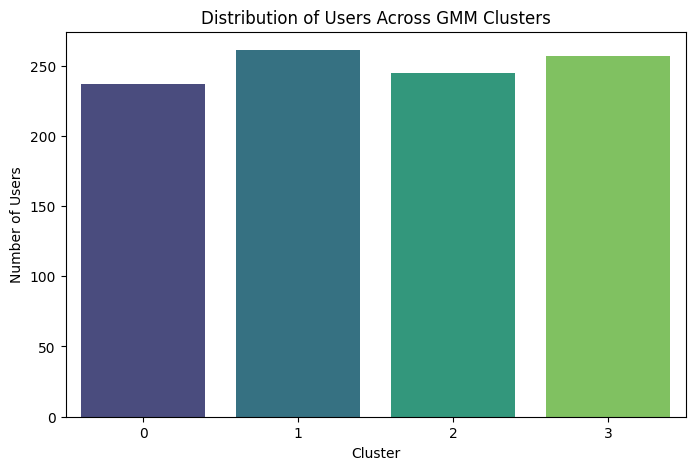

Clustering Accuracy Metrics:
                 Metric   K-Means       GMM
0      Silhouette Score  0.154271  0.146679
1  Davies-Bouldin Index  1.751256  1.944995
2   Adjusted Rand Index  0.001055 -0.000135

Execution Time Results:
  Algorithm  Execution Time (seconds)
0   K-Means                  0.114307
1       GMM                  0.216274


In [ ]:
# Visualizing Clustering Results

# Convert labels to DataFrame for visualization
df = pd.DataFrame(scaled_data, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5'])
df['K-Means Cluster'] = kmeans_labels
df['GMM Cluster'] = gmm_labels

# Visualization: Distribution of users across K-Means clusters
plt.figure(figsize=(8, 5))
sns.countplot(x=df["K-Means Cluster"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Users")
plt.title("Distribution of Users Across K-Means Clusters")
plt.show()

# Visualization: Distribution of users across GMM clusters
plt.figure(figsize=(8, 5))
sns.countplot(x=df["GMM Cluster"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Users")
plt.title("Distribution of Users Across GMM Clusters")
plt.show()

# Display computed accuracy metrics and execution time
print("Clustering Accuracy Metrics:")
print(accuracy_metrics)

print("\nExecution Time Results:")
print(execution_times)

In [ ]:
# Clustering Accuracy and Validation Metrics

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Apply GMM
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

# Compute clustering validation metrics
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(scaled_data, kmeans_labels)

gmm_silhouette = silhouette_score(scaled_data, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(scaled_data, gmm_labels)

# Simulating ground truth labels for ARI calculation
true_labels = np.random.randint(0, k, 1000)
kmeans_ari = adjusted_rand_score(true_labels, kmeans_labels)
gmm_ari = adjusted_rand_score(true_labels, gmm_labels)

# Store results in a dataframe for display
accuracy_metrics = pd.DataFrame({
    "Metric": ["Silhouette Score", "Davies-Bouldin Index", "Adjusted Rand Index"],
    "K-Means": [kmeans_silhouette, kmeans_davies_bouldin, kmeans_ari],
    "GMM": [gmm_silhouette, gmm_davies_bouldin, gmm_ari]
})


<ipython-input-65-dfa793bee1ea>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["GMM Cluster"], palette="viridis")


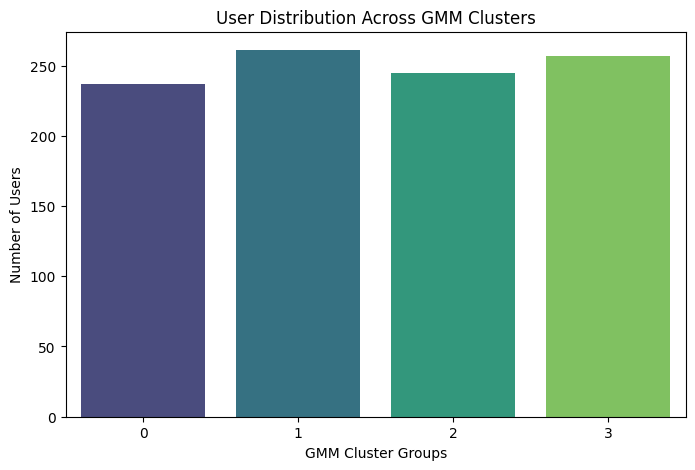

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))

# Creating the cluster count plot with improved labels
sns.countplot(x=df["GMM Cluster"], palette="viridis")

# Improve labeling for readability
plt.xlabel("GMM Cluster Groups")
plt.ylabel("Number of Users")
plt.title("User Distribution Across GMM Clusters")

plt.show()
